In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# csv 파일을 읽어 와서 데이터프레임으로 변환
df = pd.read_csv('../data/auto-mpg.csv', header=None)
print(df)

0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]


In [14]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name'] 
print(df)

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 

In [15]:
# 2. 데이터 검색

In [16]:
# horsepower 열의 자료형 변경 (문자형 -> 실수형)
df['horsepower'].replace('?', np.nan, inplace=True)         # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)      # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')         # 문자형을 실수형으로 변환
print(df.describe())

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000

In [17]:
# 3. 분석에 활용할 속성 선택 
# 4. 훈련데이터 /검증 데이터 분할

In [18]:
# 분석에 활용한 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
# 독립변수와 종속변수 선택
x=ndf[['cylinders', 'horsepower', 'weight']] # 독립 변수 : cylinders, horsepower, weight
y=ndf['mpg'] # 종속 변수 : mpg

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', x_train.shape) # 훈련 데이터: (274, 3)
print('검증 데이터: ', x_test.shape) # 검증 데이터: (118, 3)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [19]:
# 5. 모델 학습 및 모델 검증

In [20]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression
# 단순회귀분석 모델 객체 생성
lr = LinearRegression() # 모델 만들기
# train data를 가지고 모델 학습
lr.fit(x_train, y_train) # 모델 학습

# 모델 평가
# 모델 학습이 완료된 다음에 검증데이터(x_test, y_test)를 사용하여 모델의 평가지표인
# 결정계수(R-제곱) 계산
r_square = lr.score(x_test, y_test)
print(r_square) # 결정계수 : 0.6939048496695599

0.6939048496695599


In [21]:
# 회귀식의 기울기 : 독립변수 3개의 기욳기가 리스트로 리턴됨
print('X 변수의 계수 a: ', lr.coef_) # a : [-0.60691288 -0.03714088 -0.00522268]

# 회귀식의 y절편
print('상수항 b', lr.intercept_) # b : 46.414351269634025

X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]
상수항 b 46.414351269634025


[26.30243119 27.67960352 20.35480988 32.5663334  15.05079818 18.65250234
 16.5189694   8.21482855 30.00898418 28.56105525 21.63593175 22.17449944
 26.73546308 27.06911576 13.10907653 16.81024194 24.07783306 29.38394295
 11.27643241 10.64851363 12.83398787 30.95656774 23.11048993 14.9956607
 16.14345244  9.63707709 19.31184005 30.31070208 22.37815073 25.60054305
 22.17386758 22.66539802 27.34304014 24.03375623 23.58227736 30.06694949
 31.83692148 20.6513051  16.26186076 26.65768848 22.66017535 23.58573705
 30.31476048 24.14617908 23.74689385 11.7401859  14.8546484  31.8171619
 22.76694089 29.65204595 28.81465448 11.37686071 23.72676593 13.75497533
 16.3454236  23.8068028  23.83990186 29.99153659 30.15796496 26.51261777
 31.02273271 27.92508595 20.72312738 23.67799884 26.50273798 32.31273417
  9.89019362 25.48444753 23.64014488 14.31205545 10.87368749 29.35262346
 25.75065578 30.7807431  29.89694625 24.8482802  21.93884707 13.90004603
 32.09399697 31.0529045  31.23569823 11.40759807 26.0

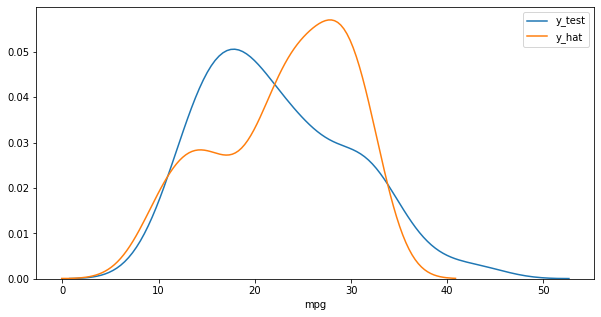

In [22]:
# 모델이 예측한 값과 실제값을 비교
y_hat = lr.predict(x_test) # 예측값 구하기
print(y_hat)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test") # 실제값
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1) # 예측값
plt.show()

In [23]:
# 다중회귀분석 결정계수 : 0.6939048496695599
# 다중회귀분석을 했을때 모델의 성능 지표인 결정계수값은 0.6939048496695599 으로 비교적 양호한 수준이다.
# 단순회귀분석의 결과와 비교할 때 데이터가 어는 한쪽으로 편향되는 경향은 그대로 남아 있지만 그래프의 첨도(뽀족한 정도)가 약간 누그러진 것을 볼 수 있다.